평가
=====

머신러닝은 데이터 전처리(가공/변환), 모델링(학습/예측), 평가(Evaluation)의 프로세스로 구성.<br>
지난 4회차 강의에서 타이타닉 생존자 예제에서 예측 모델 평가는 정확도 Accuracy를 이용.<br>

머신러닝 모델은 여러가지 방법으로 예측 성능을 평가 가능, 성능 평가 지표(Evaluation Metric)은 Classfication / Regression 에 따라 다름

이번 5회차는 Classfication의 평가 방법에 대해 알아본다.<br>
특히 0과 1로 결정값이 한정되는 이진 분류의 성능 평가에 대해서 집중적으로 살펴본다.





### 분류의 성능 평가 지표


- 정확도(Accuracy)
- 오차행렬(Confusion Matrix)
- 정밀도(Precision)
- 재현율(Recall)
- F1 스코어
- ROC AUC
<br>

분류는 결정 클래스 값 종류의 유형에 따라 긍정/부정과 같은 2개의 결괏값만을 가지는 이진분류<br>
여러 개의 결정 클래스 값을 가지는 멀티 분류로 나뉠 수 있다. 

### 정확도(Accuracy)

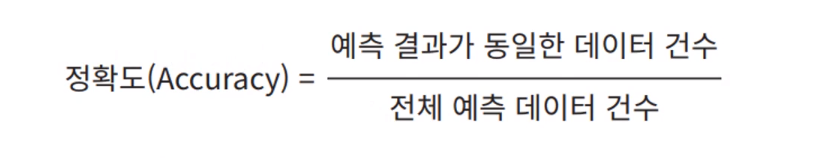

- 정확도는 직관적으로 모델 예측 성능을 나타내는 평가 지표
- But, 이진 분류의 경우 데이터의 구성에 따라 ML 모델의 성능을 왜곡할 수 있기에 정확도 수치 하나만 가지고 평가 X

앞선 타이타닉 예제 수행시, ML 알고리즘 적용 후 정확도의 결과가 80%대 였다.<br>
탑승객이 남자인 경우보다 여자인 경우에 생존 확률이 높았고, 별다른 알고리즘 적용없이 무조건 성별인 여자인 경우 생존<br>
남자인 경우는 사망으로 예측 결과를 예측해도 이와 비슷한 수치가 나올 수 있다. 

In [ ]:
import numpy as np
from sklearn.base import BaseEstimator
# sklearn BaseEstimator 상속
class MyDummyClassifier(BaseEstimator): #Custom 가능
    # fit( ) 메소드는 아무것도 학습하지 않음. 
    def fit(self , X , y=None):
            pass
    
    # predict( ) 메소드는 단순히 Sex feature가 1 이면 0 , 그렇지 않으면 1 로 예측함. 
    def predict(self, X):
        print("@",X.shape)
        print("@@",X.shape[0])
        pred = np.zeros( ( X.shape[0] , 1))
        print("@@@",pred)
        print("@@@@",pred.shape)
        #pred는 결정값
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0 #사망
            else :
                pred[i] = 1 #생존
        
        return pred

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)

# 위에서 생성한 Dummy Classifier를 이용하여 학습/예측/평가 수행. 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)



mypredictions = myclf.predict(X_test)
print('Dummy Classifier의 정확도는: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

### Accuracy 평가 지표의 맹점

1. 불균형한 레이블 값 분포<br>
    - 100개의 데이터, 90개의 데이터 레이블이 0, 10개의 데이터 레이블 1 : 0을 예측 ML모델 정확도 90%

In [ ]:
# MNIST 데이터 세트 -> 불균형 데이터 세트로 변환
# 레이블 7만 True, 나머지 값은 모두 False

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# load_digits()에서 target == 7의 여부에 따라 클래스값을 True/False 이진분류한 데이터 세트를 사용해서
# 무조건 Negative로 예측하는 classifier
class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y): #학습 X
        pass
    
    # 입력값으로 들어오는 X 데이터 셋의 크기만큼 모두 0값으로 만들어서 반환
    def predict(self,X):
        print(len(X))
        return np.zeros( (len(X),1) , dtype=bool) #predict의 결과를 np.zeros()로 모두 0값 반환

# 사이킷런의 내장 데이터 셋인 load_digits( )를 이용하여 MNIST 데이터 로딩
digits = load_digits()

print(digits.data)
print("### digits.data.shape",digits.data.shape)
print(digits.target)
print("### digits.target.shape",digits.target.shape)


In [ ]:

# digits번호가 7번이면 True이고 이를 astype(int)로 1로 변환, 7번이 아니면 False이고 0으로 변환. 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [ ]:
# 불균형한 레이블 데이터 분포도 확인. 
print('레이블 테스트 세트 크기 :', y_test.shape)
print('테스트 세트 레이블 0 과 1의 분포도')
print(pd.Series(y_test).value_counts())

# Dummy Classifier로 학습/예측/정확도 평가
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('모든 예측을 0으로 하여도 정확도는:{:.3f}'.format(accuracy_score(y_test , fakepred)))

이처럼 정확도 평가 지표는 불균형한 레이블 데이터 세트에서는 성능 수치로 사용되어선 안된다.<br>
정확도가 가지는 분류 평가 지표로서 이러한 한계점을 극복하기 위해 여러 가지 분류 지표와 함께 적용해야 한다.

# 오차 행렬(Confusion Matrix, 혼동 행렬)

True/False, Positive/Negative의 4분면으로 구성되는 오차 행렬(Confusion Matrix)<br>

![img2](./img2.png)

TN, FP, FN, TP는 예측 클래스와 실제 클래스의 Positive 결정 값(1)과 Negative 결정값(0)에 따라 결정

예) TN은 True Negative의 의미.<br>
앞의 True는 예측 클래스 값과 실제 클래스 값이 같다는 의미, 뒤의 Negative는 예측 값이 Negative 값이라는 의미.<br>
즉 TN은 예측을 Negative 값 0으로 예측했는데 실제 값도 Negative 값 0이라는 의미.

- TN은 예측값을 Negative 값 0으로 예측했고, 실제 값 역시 Negative 값 0이다.
- FP는 예측값을 Positive 값 1로 예측했는데, 실제 값은 Negative 값 0이다.
- FN은 예측값을 Negative 값 0으로 예측했는데, 실제 값은 Positive 값 1이다.
- TP는 예측값을 Positive 값 1로 예측했고, 실제 값 역시 Positive 값 1이다.

사이킷런은 오차행렬을 구할수 있게 confusion_matrix() API를 제공한다. 

In [ ]:
from sklearn.metrics import confusion_matrix

# 앞절의 예측 결과인 fakepred와 실제 결과인 y_test의 Confusion Matrix출력
confusion_matrix(y_test , fakepred)

위의 출력된 오차 행렬은 ndarray 형태.<br>
이진 분류의 TN, FP, FN, TP는 위의 표와 동일한 위치를 가진다.<br>
즉, TN은 array[0,0]의 405, FP는 array[0,1]로 0, FN은 array[1,0]=45, TP는 array[1,1]로 0에 해당한다.

![img3](./img3.jpg)

# 정확도 재정의

**정확도 = (TN+TP) / (TN+FP+FN+TP)**

------------
# 정밀도와 재현율

Positive 데이터 세트의 예측 성능에 좀 더 초첨을 맞춘 평가 지표.

**정밀도 = TP / (FP + TP)<br>
재현율 = TP / (FN + TP)**

- 정밀도는 예측을 Positive로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻한다.
- 재현율은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한데이터의 비율을 뜻한다.

재현율과 정밀도 모두 TP를 높이는데 동일

- 재현율은 FN(실제 Positive, 예측 Negative)를 낮춤
- 정밀도는 FP를 낮추는데 초점

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("정밀도:",precision_score(y_test, fakepred))
print("재현율:",recall_score(y_test,fakepred))

In [ ]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}'.format(accuracy , precision ,recall))

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression

# 원본 데이터를 재로딩, 데이터 가공, 학습데이터/테스트 데이터 분할. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression()

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

-----
# 정밀도/재현율 TradeOff

###### 재현율이 중요 지표인 경우

실제 Positive 양성 데이터를 Negative로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우이다.<br>
예) 암 판단 모델에서 실제 Positive인 암환자를 Negative로 판단하게 되는 경우<br>
예) 금융 거래 사기 판단 모델에서 실제 사기인 Positive 건을 Negative로 판단하는 경우

###### 정밀도가 중요 지표인 경우

실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생하는 경우<br>
예) 스팸 메일 여부를 판단하는 모델의 경으, 실제 Negative인 일반 메일을 Positive인 스팸 메일로 분류할 경우


-------------

불균형한 레이블 클래스를 가지는 이진 분류 모델에서는 많은 데이터 중에서 중점적으로 찾아야 하는 매우 적은 수의,<br>
결과값에 Positive를 설정해 1값을 부여하고, 그렇지 않은 경우는 Negative로 0값을 부여한다

-----------------

<u>정밀도 또는 재현율이 강조돼야 할 경우 분류의 결정 임계값(Threshold)를 조정해 정밀도 또는 재현율을의 수치를 높일수 있다.<br>
하지만 정밀도와 재현율은 상호 보완적인 평가 지표이기 때문에 어느 한쪽을 강제로 조정하면 값이 떨어지거나 올라갈수 있다.</u>

사이킷런의 분류 알고리즘은 예측 데이터가 특정 레이블(Label, 결정 클래스값)에 속하는지 계산하기 위해 <br>
먼저 개별 레이블 별로 결정 확률을 구한다. 예측 확률이 큰 레이블 값으로 예측하게 된다.<br>

예) 이진 분류 모델에서 특정 데이터가 0이 될 확률이 10%, 1이 될 확률이 90%로 예측됐다면 최종 예측은<br>
더 큰 확률을 가진, 즉 90%확률을 가진 1로 예측한다. 

일반적으로 이진 분류에서는 임계값(Threshold)를 0.5, 즉 50%로 정하고 이 기준 값보다 크면 Positive, 작으면 Negative로 결정

![img7](./img7.jpg)

사이킷런은 개별 데이터별로 예측 확률을 반환하는 메서드인 predict_proba()를 제공한다.<br>

predict_proba() 메서드는 학습이 완료된 사이킷런 classifier 객체에서 호출이 가능

테스트 피처 데이터 세트를 파라미터로 입력해주면 테스트 피처 레코드의 개별 클래스 예측 확률을 반환한다.


### Predict_proba() 메소드 확인

In [ ]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba()결과 Shape : {0}'.format(pred_proba.shape))
print('pred_proba array에서 앞 3개만 샘플로 추출 \n:', pred_proba[:3])

print('pred 결과 Shape : {0}'.format(pred.shape))
print('pred에서 앞 3개만 샘플로 추출 \n:', pred[:3])


# 예측 확률 array 와 예측 결과값 array 를 concatenate 하여 예측 확률과 결과값을 한눈에 확인
pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('두개의 class 중에서 더 큰 확률을 클래스 값으로 예측 \n',pred_proba_result[:3])


### Binarizer 활용

In [ ]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# threshold 기준값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

#### 분류 결정 임계값 0.5 기반에서 Binarizer를 이용하여 예측값 반환

In [ ]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.5

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)


#### 분류 결정 임계값 0.4 기반에서 Binarizer를 이용하여 예측값 반환

In [ ]:
from sklearn.preprocessing import Binarizer

#Binarizer의 threshold 설정값. 분류 결정 임곗값임.  
custom_threshold = 0.4

# predict_proba( ) 반환값의 두번째 컬럼 , 즉 Positive 클래스 컬럼 하나만 추출하여 Binarizer를 적용
pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

분류 결정 임계값은 Positive 예측값을 결정하는 확률의 기준이 된다.<br>
확률이 0.5가 아닌 0.4부터 Positive로 예측을 더 너그럽게 하기 떄문에 임계값을 낮출수록 True값이 더 많아지게 된다.

Positive 예측값이 많아지면 상대적으로 재현율의 값이 높아진다.

In [ ]:
# 테스트를 수행할 모든 임곗값을 리스트 객체로 저장. 
thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds list객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

#### Precision_recall_curve()를 이용하여 임계값에 따른 정밀도-재현율 값 추출

In [ ]:
from sklearn.metrics import precision_recall_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

# 실제값 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve 인자로 입력 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('반환된 분류 결정 임곗값 배열의 Shape:', thresholds.shape)
print('반환된 precisions 배열의 Shape:', precisions.shape)
print('반환된 recalls 배열의 Shape:', recalls.shape)


#반환된 임계값 배열 로우가 147건이므로 샘플로 10건만 추출하되, 임곗값을 15 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 15)
print('샘플 추출을 위한 임계값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 15 step 단위로 추출된 임계값에 따른 정밀도와 재현율 값 
print('샘플 임계값별 정밀도: ', np.round(precisions[thr_index], 3))
print('샘플 임계값별 재현율: ', np.round(recalls[thr_index], 3))

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


# 정밀도와 재현율의 맹점

Positive 예측의 임계값을 변경함에 따라 정밀도와 재현율의 수치가 변경된다.<br>
임계값의 변화는 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용돼야 한다.

# F1 스코어

F1 스코어는 정밀도와 재현율을 결합한 지표이다.<br>
F1 스코어는 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 값을 가진다.<br>


![img4](./img4.jpg)

- A 예측 모델
    - 정밀도 0.9 / 재현율 0.1 의 극단적인 차이의 F1 스코어 0.18
- B 예측 모델
    - 정밀도 0.5 / 재현율 0.5 의 F1 스코어 0.5

In [ ]:
# 사이킷런은 F1스코어를 구하기 위해 f1_score()라는 API 제공

from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)

print('F1 스코어: {0:.4f}'.format(f1))

In [ ]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    # F1 스코어 추가
    f1 = f1_score(y_test,pred)
    print('오차 행렬')
    print(confusion)
    # f1 score print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)

F1 스코어는 Threshold 0.6일때 가장 높지만, 정밀도와 재현율의 차이가 크다.

# ROC 곡선과 AUC

ROC 곡선과 이에 기반한 AUC 스코어는 이진 분류의 예측 성능 측정에서 중요하게 사용된 지표다.<br>

ROC곡선은 FPR(False Positive Rate)이 변할때 TPR(True Positive Rate)이 어떻게 변하는지를 나타내는 곡선.

FPR을 X축으로, TPR을 Y축으로 잡으면 FPR의 변화에 따른 TPR의 변화가 곡선 형태로 나타난다.

<u>분류의 성능 지표로 사용되는 것은 ROC 곡선 면적에 기반한 AUC 값으로 결정한다.<br>
AUC(Area Under Curve) 값은 ROC 곡선 밑의 면적을 구한 것으로서 일반적으로 1에 가까울수록 좋은 수치이다.</u>

TPR(True Positive Rate)는 재현율을 나타낸다.<br>
- TPR은 TP / ( FN + TP )
- TPR, 즉 재현율은 민감도로도 불린다.

FPR은 실제 Negative(음성)을 잘못 예측한 비율을 나타낸다.<br>
- 실제는 Negative인데 Positive 또는 Negative로 예측한 것 중 Positive로 잘못 예측한 비율이다.
- FPR = FP / (FP+TN)

어떻게 FPR 변경하냐? - 임계값 변경


![img5](./img5.png)

#### 사이킷런은 임계값에 따른 ROC 곡선 데이터를 roc_curve()로, AUC스코어를 roc_auc_score() 함수로 제공

![img6](./img6.jpg)

In [ ]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 반환된 임곗값 배열 로우가 47건이므로 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
# thresholds[0]은 max(예측확률)+1로 임의 설정됨. 이를 제외하기 위해 np.arange는 1부터 시작 

print(thresholds.shape[0])

thr_index = np.arange(1, thresholds.shape[0], 5)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))


In [ ]:
thresholds

In [ ]:
thr_index

In [ ]:
thresholds.shape[0]

In [ ]:
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [ ]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
